# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

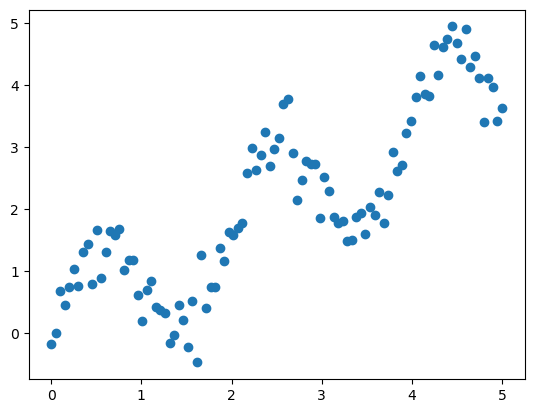

In [3]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6308158188077869


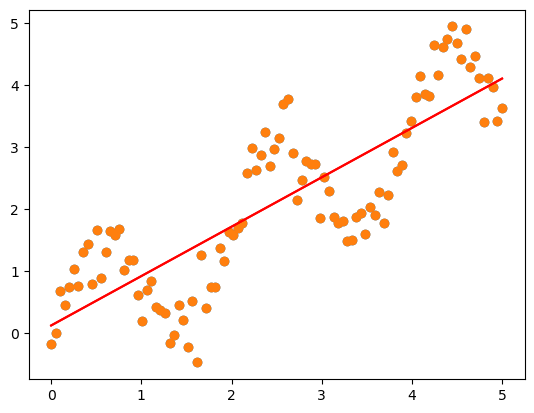

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)
plt.show()

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

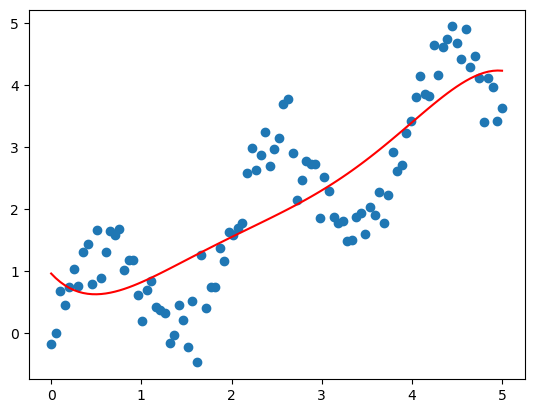

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
plt.show()

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.56520168  2.25969821 -1.04031216  0.22235382 -0.0173857 ]
interception:  0.9590097624759033


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.95900976, 0.88559054, 0.82291518, 0.77023079, 0.72681783,
       0.69198942, 0.66509066, 0.64549794, 0.63261827, 0.62588858,
       0.62477502, 0.6287723 , 0.63740301, 0.65021691, 0.66679024,
       0.68672507, 0.70964859, 0.73521241, 0.76309191, 0.79298554,
       0.82461411, 0.85772014, 0.89206717, 0.92743905, 0.96363926,
       1.00049025, 1.03783274, 1.07552502, 1.11344228, 1.15147592,
       1.18953287, 1.2275349 , 1.26541793, 1.30313135, 1.34063734,
       1.37791017, 1.41493551, 1.45170979, 1.48823945, 1.52454029,
       1.56063681, 1.59656145, 1.63235397, 1.66806075, 1.70373409,
       1.73943153, 1.77521517, 1.81115097, 1.8473081 , 1.88375821,
       1.92057477, 1.95783236, 1.99560605, 2.03397061, 2.07299993,
       2.11276625, 2.15333954, 2.19478677, 2.23717124, 2.28055189,
       2.32498264, 2.37051166, 2.41718071, 2.46502446, 2.51406979,
       2.56433513, 2.61582972, 2.66855299, 2.72249383, 2.77762992,
       2.83392705, 2.89133842, 2.94980396, 3.00924965, 3.06958

In [16]:
regr_poly.predict(X_poly)

array([0.95900976, 0.88559054, 0.82291518, 0.77023079, 0.72681783,
       0.69198942, 0.66509066, 0.64549794, 0.63261827, 0.62588858,
       0.62477502, 0.6287723 , 0.63740301, 0.65021691, 0.66679024,
       0.68672507, 0.70964859, 0.73521241, 0.76309191, 0.79298554,
       0.82461411, 0.85772014, 0.89206717, 0.92743905, 0.96363926,
       1.00049025, 1.03783274, 1.07552502, 1.11344228, 1.15147592,
       1.18953287, 1.2275349 , 1.26541793, 1.30313135, 1.34063734,
       1.37791017, 1.41493551, 1.45170979, 1.48823945, 1.52454029,
       1.56063681, 1.59656145, 1.63235397, 1.66806075, 1.70373409,
       1.73943153, 1.77521517, 1.81115097, 1.8473081 , 1.88375821,
       1.92057477, 1.95783236, 1.99560605, 2.03397061, 2.07299993,
       2.11276625, 2.15333954, 2.19478677, 2.23717124, 2.28055189,
       2.32498264, 2.37051166, 2.41718071, 2.46502446, 2.51406979,
       2.56433513, 2.61582972, 2.66855299, 2.72249383, 2.77762992,
       2.83392705, 2.89133842, 2.94980396, 3.00924965, 3.06958

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

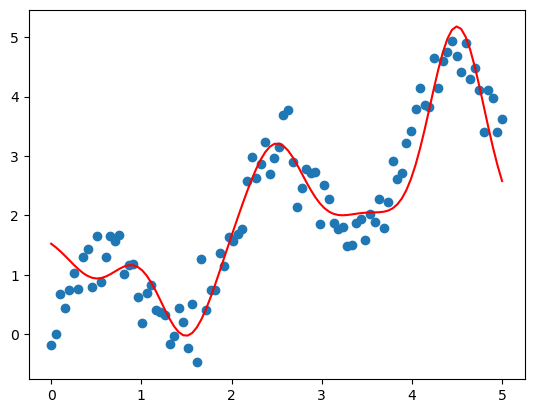

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.77027704 -1.74403426  1.50078184  0.3121073   3.46243906]
interception:  1.7160333707128892


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

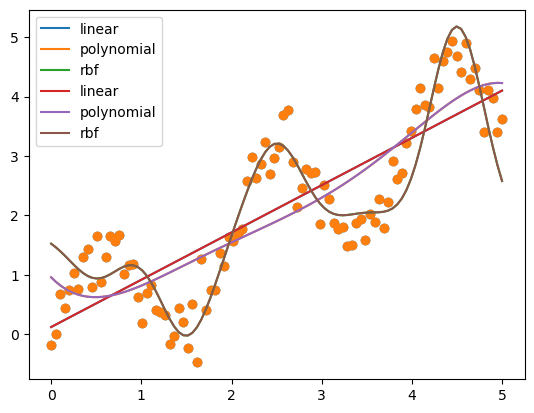

In [26]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [27]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6308158188077869


In [28]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5807173486748053


In [29]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24535420406042083
